<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Manipulation, EDA, and Reporting Results

_Authors: Joseph Nelson (DC), Sam Stack (DC)_

---

> **This lab is intentionally open-ended, and you're encouraged to answer your own questions about the dataset!**


### What makes a song a hit?

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. 

Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

**Provide (at least) a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?**

---

### Minimum Requirements

**At a minimum, you must:**

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

**You should strive to:**

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualizations

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Billboard data CSV:
billboard_csv = './datasets/billboard.csv'

# We need to use encoding='latin-1' to deal with non-ASCII characters.
df = pd.read_csv(billboard_csv, encoding='latin-1')

In [18]:
df.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          312 non-null float64
x3rd.week          307 non-null float64
x4th.week          300 non-null float64
x5th.week          292 non-null float64
x6th.week          280 non-null float64
x7th.week          269 non-null float64
x8th.week          260 non-null float64
x9th.week          253 non-null float64
x10th.week         244 non-null float64
x11th.week         236 non-null float64
x12th.week         222 non-null float64
x13th.week         210 non-null float64
x14th.week         204 non-null float64
x15th.week         197 non-null float64
x16th.week         182 no

In [20]:
df.describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Some initial findings on the dataset:

**year**: The song's release year. This dataset consists of Billboard chart-topping singles released in the year 2000.

**artist.inverted**: The artist's name, formatted in Last, First

**track**: The name of the track

**time**: The song's length. This is stored as a string and will need to be converted to a timedelta or an integer representing seconds.

**genre**: The genre of the song

**date.entered**: The date at which the song first appeared on the chart

**date.peaked**: The date at which the song peaked on the chart

There are a number of columns measuring the song's position on the chart after a given number of weeks. They take the following format: **xNth.week**

In [21]:
# Set up a dictionary to replace the periods in column names with underscores
column_dict = {}
for column in df:
    temp_name = column.replace('.','_')
    new_name = temp_name.replace('x', 'rank_')
    column_dict[column] = new_name
column_dict

{'year': 'year',
 'artist.inverted': 'artist_inverted',
 'track': 'track',
 'time': 'time',
 'genre': 'genre',
 'date.entered': 'date_entered',
 'date.peaked': 'date_peaked',
 'x1st.week': 'rank_1st_week',
 'x2nd.week': 'rank_2nd_week',
 'x3rd.week': 'rank_3rd_week',
 'x4th.week': 'rank_4th_week',
 'x5th.week': 'rank_5th_week',
 'x6th.week': 'rank_6th_week',
 'x7th.week': 'rank_7th_week',
 'x8th.week': 'rank_8th_week',
 'x9th.week': 'rank_9th_week',
 'x10th.week': 'rank_10th_week',
 'x11th.week': 'rank_11th_week',
 'x12th.week': 'rank_12th_week',
 'x13th.week': 'rank_13th_week',
 'x14th.week': 'rank_14th_week',
 'x15th.week': 'rank_15th_week',
 'x16th.week': 'rank_16th_week',
 'x17th.week': 'rank_17th_week',
 'x18th.week': 'rank_18th_week',
 'x19th.week': 'rank_19th_week',
 'x20th.week': 'rank_20th_week',
 'x21st.week': 'rank_21st_week',
 'x22nd.week': 'rank_22nd_week',
 'x23rd.week': 'rank_23rd_week',
 'x24th.week': 'rank_24th_week',
 'x25th.week': 'rank_25th_week',
 'x26th.week': 'ra

In [22]:
# Rename the columns:

df.rename(columns=column_dict, inplace=True)
df.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,rank_1st_week,rank_2nd_week,rank_3rd_week,...,rank_67th_week,rank_68th_week,rank_69th_week,rank_70th_week,rank_71st_week,rank_72nd_week,rank_73rd_week,rank_74th_week,rank_75th_week,rank_76th_week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# A helper function to turn the 'time' column to seconds
def string_to_seconds(t):
    time_array = t.split(sep=':')
    assert len(time_array) == 2
    minutes, seconds = map(int, time_array)
    total = (minutes * 60) + seconds
    return total

test_string = '3:38'
string_to_seconds(test_string)

218

In [36]:
# Convert the time column to seconds
df['time'] = df['time'].apply(string_to_seconds)
df.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,rank_1st_week,rank_2nd_week,rank_3rd_week,...,rank_67th_week,rank_68th_week,rank_69th_week,rank_70th_week,rank_71st_week,rank_72nd_week,rank_73rd_week,rank_74th_week,rank_75th_week,rank_76th_week
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# What was the most popular genre?
df['genre'].value_counts()

Rock           137
Country         74
Rap             58
R&B             23
Pop              9
Latin            9
Electronica      4
Jazz             1
Reggae           1
Gospel           1
Name: genre, dtype: int64

In [125]:
# Who was the most popular artist?
df['artist_inverted'].value_counts().head()

Jay-Z                5
Houston, Whitney     4
Dixie Chicks, The    4
Rimes, LeAnn         3
McGraw, Tim          3
Name: artist_inverted, dtype: int64

## Analyzing The Lifespan of a Hit Single

In [60]:
# Create a new column to measure the number of weeks each song spent on the chart
def count_present_ranks(row):
    count = 0
    for col in row:
        if not(np.isnan(col)):
            count += 1
    return count

df['total_chart_weeks'] = df.iloc[:,7:].apply(count_present_ranks, axis=1)

In [61]:
df.head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,rank_1st_week,rank_2nd_week,rank_3rd_week,...,rank_68th_week,rank_69th_week,rank_70th_week,rank_71st_week,rank_72nd_week,rank_73rd_week,rank_74th_week,rank_75th_week,rank_76th_week,total_chart_weeks
0,2000,Destiny's Child,Independent Women Part I,218,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
1,2000,Santana,"Maria, Maria",258,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,2000,Savage Garden,I Knew I Loved You,247,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
3,2000,Madonna,Music,225,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),218,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21


In [62]:
df['total_chart_weeks'].describe()

count    317.000000
mean      16.741325
std        9.083785
min        1.000000
25%       10.000000
50%       18.000000
75%       20.000000
max       57.000000
Name: total_chart_weeks, dtype: float64

The average song spent 16.7 weeks on the chart, while the median time on charts was 18 weeks. The longest time spent on the chart was 57 weeks. Here's that song:

In [64]:
df.loc[df['total_chart_weeks'] == 57]

,year,artist_inverted,track,time,genre,date_entered,date_peaked,rank_1st_week,rank_2nd_week,rank_3rd_week,...,rank_68th_week,rank_69th_week,rank_70th_week,rank_71st_week,rank_72nd_week,rank_73rd_week,rank_74th_week,rank_75th_week,rank_76th_week,total_chart_weeks
46,2000,Creed,Higher,316,Rock,1999-09-11,2000-07-22,81,77.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57


In [66]:
# What genres of music tend to stay on the charts longer?

df.groupby('genre').total_chart_weeks.describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Country,74.0,16.216216,7.270263,2.0,12.00,19.5,20.0,55.0
Electronica,4.0,18.000000,4.000000,12.0,18.00,20.0,20.0,20.0
Gospel,1.0,20.000000,NaN,20.0,20.00,20.0,20.0,20.0
Jazz,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
Latin,9.0,19.222222,7.293452,5.0,17.00,18.0,20.0,32.0
Pop,9.0,15.222222,8.120618,3.0,12.00,16.0,18.0,29.0
R&B,23.0,11.347826,6.176265,1.0,6.50,12.0,17.0,20.0
Rap,58.0,14.431034,8.764186,1.0,8.25,14.0,20.0,53.0
Reggae,1.0,15.000000,NaN,15.0,15.00,15.0,15.0,15.0


Based on median number of weeks spent on the chart by genre, it appears Rock, Electronica and Gospel songs tend to have a longer lifespan. This is more significant in Rock due to a larger sample size. Moreover, the Creed song identified earlier as the longest-charting track was a Rock song.

For genres with more than 20 hit songs, rap and R&B tracks have the shortest lifespans on the charts. This may indicate an audience's tendency to stay current by listening to the newest music. Other factors such as availability in stores or the rise of file-sharing in the late 90's/early 2000's may be at play.

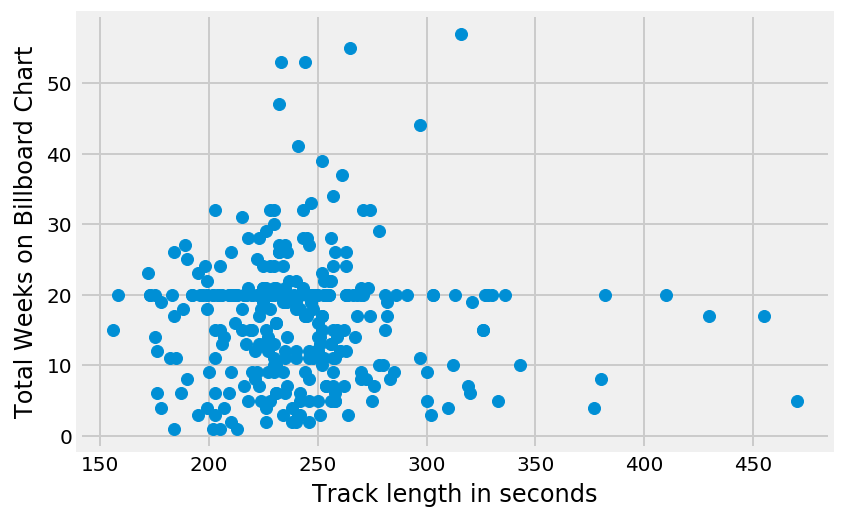

In [101]:
plt.scatter(df['time'], df['total_chart_weeks'])
plt.xlabel('Track length in seconds')
plt.ylabel('Total Weeks on Billboard Chart')
plt.show()

The correlation between a track's length and the total time spent on the Billboard charts is weak-positive or non-existent.

Text(0.5, 0, 'Total Weeks on Chart')

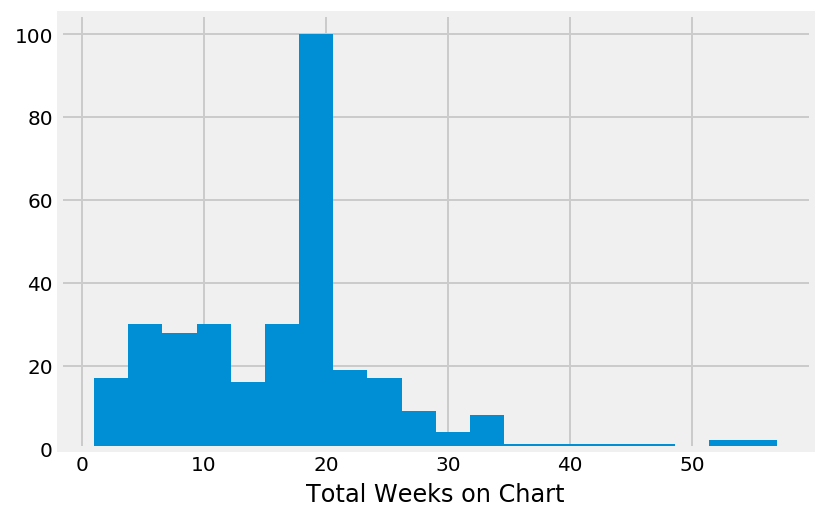

In [105]:
plt.hist(df['total_chart_weeks'], bins=20)
plt.xlabel('Total Weeks on Chart')

## A Look at Number-One Hits

In [86]:
# Identify songs that peaked at number 1

def reached_first(row):
    for col in row:
        if col == 1:
            return 1
    return 0

In [87]:
df['reached_first'] = df.iloc[:,7:].apply(reached_first, axis=1)

In [88]:
df['reached_first'].value_counts()

0    296
1     21
Name: reached_first, dtype: int64

In [89]:
df['reached_first'].mean()

0.06624605678233439

Only 21 ouf the 317 songs in the dataset reached the number one position at any point. This is 6.6% of all of the Billboard charting tracks for the year.

In [92]:
# What genres were most likely to reach number 1?

df.loc[df['reached_first'] == 1].genre.value_counts()

Rock       16
R&B         2
Country     1
Latin       1
Rap         1
Name: genre, dtype: int64

In [93]:
df.groupby('genre').reached_first.mean()

genre
Country        0.013514
Electronica    0.000000
Gospel         0.000000
Jazz           0.000000
Latin          0.111111
Pop            0.000000
R&B            0.086957
Rap            0.017241
Reggae         0.000000
Rock           0.116788
Name: reached_first, dtype: float64

In [119]:
genre_rank = df.loc[df['reached_first'] == 1].genre.value_counts()

In [120]:
genres = list(genre_rank.index)

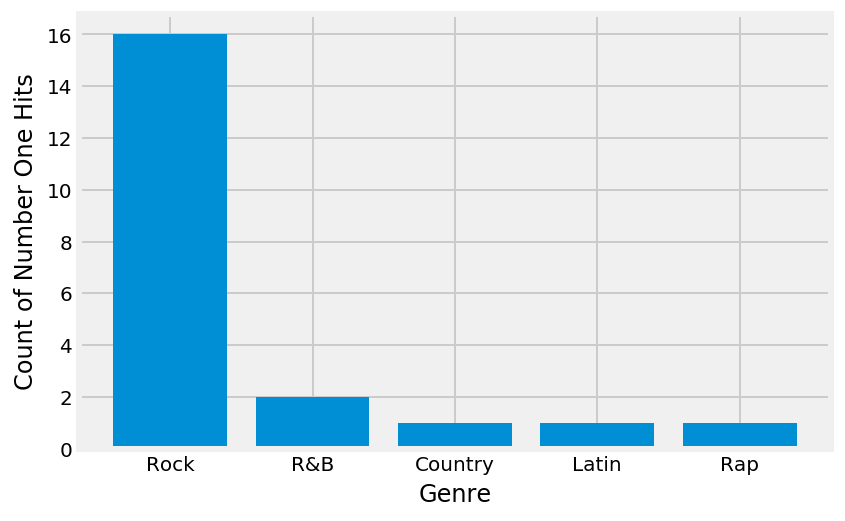

In [124]:
plt.bar(genres, genre_rank)
plt.xlabel('Genre')
plt.ylabel('Count of Number One Hits')
plt.show()

16 Rock songs reached number one, which is 3x more than all the other genres combined. If a Rock song reached the Hot 100 chart, it had an 11.7% chance of hitting #1

In [99]:
df.loc[df['reached_first'] == 1].artist_inverted.value_counts().head()

Destiny's Child        2
Aguilera, Christina    2
Janet                  1
matchbox twenty        1
Lonestar               1
Name: artist_inverted, dtype: int64

Looking at the number 1 hits by artist reveals unexpected results, given that Rock was the top category, so I decided to look into the "top rock artists" below:

In [98]:
df.loc[df['genre'] == 'Rock'].artist_inverted.value_counts().head()

Houston, Whitney    4
Thomas, Carl        3
Braxton, Toni       3
Destiny's Child     3
Limp Bizkit         3
Name: artist_inverted, dtype: int64

Whitney Houston has 4 chart-topping songs that were classified as rock. More on these below:

In [97]:
df[df['artist_inverted'] == 'Houston, Whitney'].head()

,year,artist_inverted,track,time,genre,date_entered,date_peaked,rank_1st_week,rank_2nd_week,rank_3rd_week,...,rank_69th_week,rank_70th_week,rank_71st_week,rank_72nd_week,rank_73rd_week,rank_74th_week,rank_75th_week,rank_76th_week,total_chart_weeks,reached_first
27,2000,"Houston, Whitney",My Love Is Your Love,256,Rock,1999-09-04,2000-01-08,81,68.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,0
111,2000,"Houston, Whitney",I Learned From The Best,258,Rock,2000-02-19,2000-03-25,83,83.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0
184,2000,"Houston, Whitney",Could I Have This Kiss Forever,234,Rock,2000-06-17,2000-08-05,74,68.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,0
239,2000,"Houston, Whitney","Same Script, Different Cast",285,Rock,2000-06-17,2000-07-15,71,71.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0
